In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Contact/Contato

Se você quer entrar em contato comigo envie uma mensagem para o linkedin abaixo.

If you want to contact me send a message to linkedin below.

https://www.linkedin.com/in/joao-paulo-andrade-936415191/

# Regressão Linear

Nosso objetivo é análisar um dataset de ecommerce fazendo por regressão linear. Começaremos fazendo a AED(Análise exploratória de dados), faremos a regressão linear, ridge e lasso e compararemos os resultados. 

A regressão linear tem por objetivo aproximar um conjunto de dados por uma reta. No caso geral, não vai existir uma unica reta que aproxime os dados. Essa reta pode ser usada tanto para classificar os dados quanto para fazer previsões. Na segunda parte descreveremos brevemente o método de minimos quadrados para aproximar a reta do nosso conjunto de dados.   

Our goal is to analyze an ecommerce dataset using linear regression. We will start by doing EDA (exploratory data analysis), we will do linear regression, ridge and lasso and compare the results.

Linear regression aims to approximate a set of data along a line. In the general case, there will not be a single line that approximates the data. This line can be used both to classify the data and to make predictions. In the second part we will briefly describe the least squares method to approximate the line to our data set.

In [2]:
df= pd.read_csv("Ecommerce.csv")

In [3]:
df.head()

,Email,Endereco,Avatar,Media de tempo,Tempo no app,Tempo no site,Duracao da filiacao,Total gasto por ano
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [4]:
df.describe()

,Media de tempo,Tempo no app,Tempo no site,Duracao da filiacao,Total gasto por ano
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [5]:
sns.set_palette("GnBu_d")
sns.set_style('darkgrid')

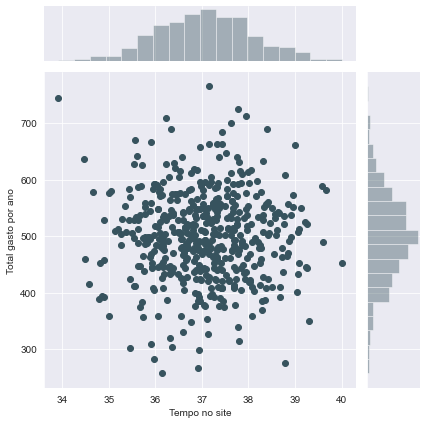

In [6]:
sns.jointplot(x='Tempo no site',y='Total gasto por ano',data=df)

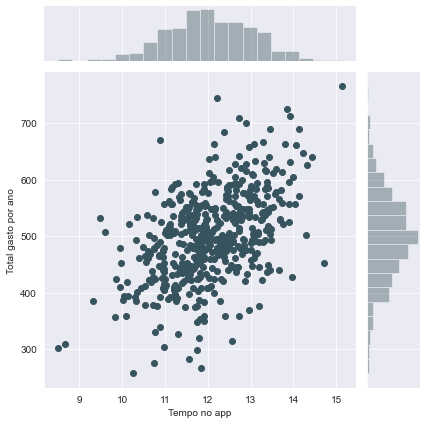

In [7]:
sns.jointplot(x='Tempo no app',y='Total gasto por ano',data=df)

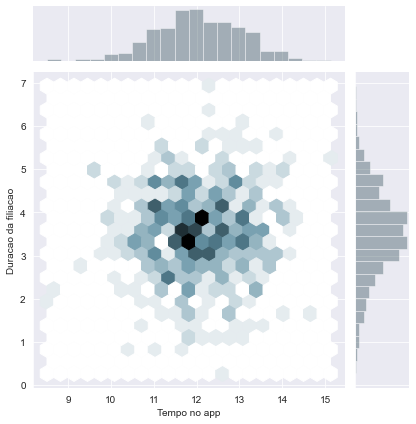

In [8]:
sns.jointplot(x='Tempo no app',y='Duracao da filiacao',kind='hex',data=df)

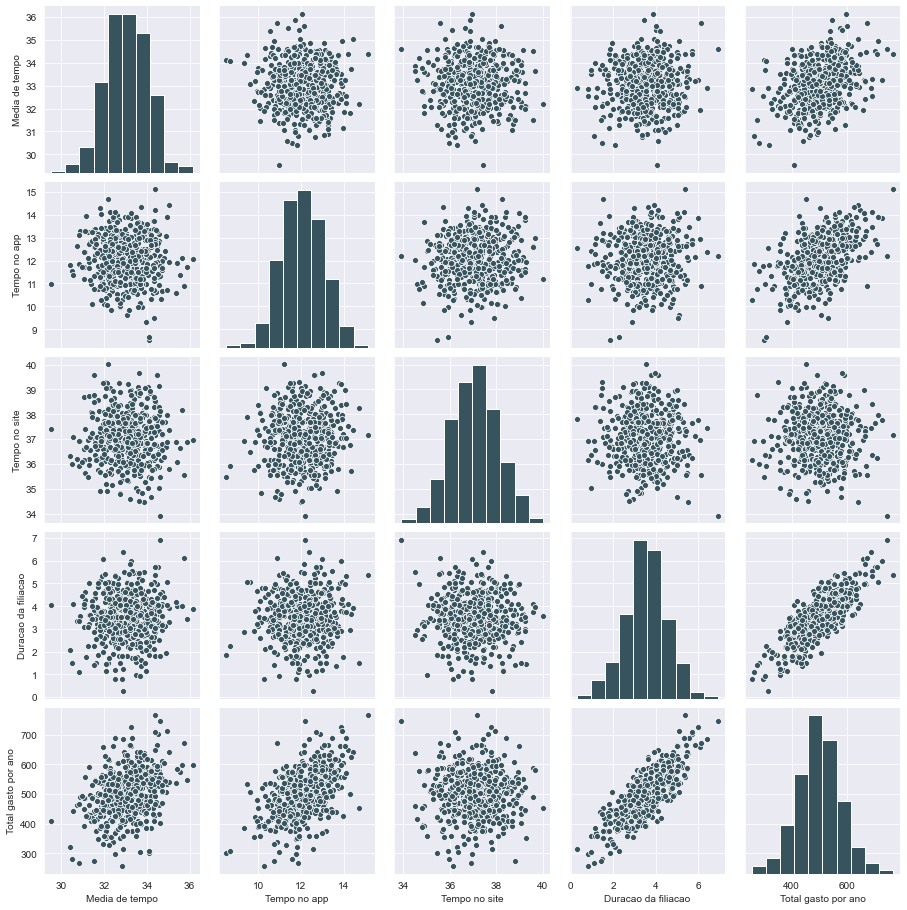

In [9]:
sns.pairplot(df)

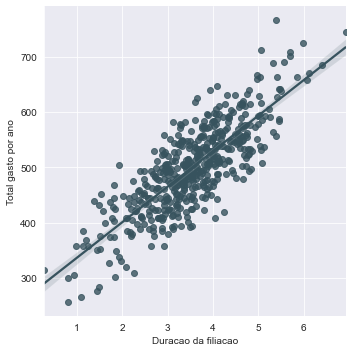

In [10]:
sns.lmplot(x='Duracao da filiacao',y='Total gasto por ano',data=df)

## Pequeno resumo de regressão linear

Como dito anteriormente, dado um conjunto de pontos $\{(x_{1},y_1), \cdots (x_{n},y_n)\}$, nosso objetivo é achar a reta que melhor se ajusta nesses pontos. Por simplicidade vamos manter as contas no $\mathbb{R}^2$. Ou seja, queremos achar uma equação do formato $f(x) = y = ax + b$ que melhor se ajuste aos pontos acima. 

As stated before, given a set of points $\{(x_ {1}, y_1), \cdots (x_ {n}, y_n)\}$, our goal is to find the line that best fits these points. For simplicity we will keep the accounts in $\mathbb{R}^2 $. That is, we want to find an equation of the format $f (x) = y = ax + b$ that best fits the points above. 

$\begin{align}
&y_1 = x_1a+b\\
&y_2 = x_2a+b\\
&\vdots = \vdots \\
&y_n = x_na+b
\end{align}$

Portanto, queremos achar os valores de $a$ e $b$ de forma que a reta interpole os pontos. 

Therefore, we want to find the values of $a$ and $b$ so that the line interpolates the points.

O que queremos é que o somatório dos erros $[y_i - (x_i a+b)]$ seja minimo, em outras palavras queremos que:

What we want is for the sum of the errors $[y_i - (x_i a + b)]$ to be minimal, in other words we want:

$\sum_{i=1}^n [y_1 - (x_1 a+b)] =0$

Vamos utilizar como função custo o erro ao quadrado, um dos motivos é que é uma função convexa e com isso garantimos a existência de um ponto mínimo.

We will use squared error as a cost function, one of the reasons is that it is a convex function and with that we guarantee the existence of a minimum point. 

$\sum_{i=1}^n [y_i - (x_i a+b)]^2$

Derivamos parcialmente a função a cima em relação a $a$ e $b$ e igualamos a zero.

We partially derive the function above with respect to $ a $ and $ b $ then we equal it to zero.

$\dfrac{\partial}{\partial a} \sum_{i=1}^n [y_i - (x_i a+b)]^2 = -2\sum_{i=1}^n [y_i - (x_i a+b)]x_i =0$

$\dfrac{\partial}{\partial b} \sum_{i=1}^n [y_i - (x_i a+b)]^2 = -2\sum_{i=1}^n [y_i - (x_i a+b)] =0$

Obtemos o seguinte sistema linear, que ao ser resolvido nos da os valores de $a$ e $b$

We obtain the following linear system, which when solved gives us the values of $ a $ and $ b $

$\begin{cases}
na + \left( \sum_{i=1}^n x_i \right)b = \sum_{i=1}^n y_i \\
\left(\sum_{i=1}^n x_i \right) a + \left(\sum_{i=1}^n x_i^2 \right)b = \sum_{i=1}^n (x_iy_i).
\end{cases}$

## Aplicação de regressão linear

Nos três casos vamos fazer as regressões, fazer as previsões no conjunto de teste, plotar um gráfico comparativo com o valor predito e o esperado, exibir as medias de erros e as distribuições dos erros, por fim, vamos exibir os coeficientes.

In the three cases we will do the regressions, make the predictions in the test set, plot a comparative graph with the predicted and the expected value, display the error averages and the error distributions, finally, we will display the coefficients.

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

### Escalonando os dados

O método de regressão Ridge e Lasso se beneficiam de dados bem escalonados, por isso vamos escalor os dados para as três regressões que estamos performando. 

The Ridge and Lasso regression method benefit from well-scaled data, so we are going to scale the data for the three regressions that we are performing.

In [12]:
scaler = StandardScaler()

In [13]:
scaler.fit(df[["Media de tempo","Tempo no app","Tempo no site","Duracao da filiacao","Total gasto por ano"]])
dfS = scaler.transform(df[["Media de tempo","Tempo no app","Tempo no site","Duracao da filiacao","Total gasto por ano"]])

In [14]:
y =dfS[:,-1]
X =dfS[:,:-1]

Dividimos os conjuntos de dados em dados de treino e de teste

We split data sets into training and test data

In [15]:
XTrain, XTest, yTrain, yTest = train_test_split(X, y, test_size=0.3, random_state=101)

### Fazendo a regressão linear

In [16]:
lm = LinearRegression()

In [17]:
lm.fit(XTrain,yTrain)

LinearRegression()

In [18]:
predictions = lm.predict( XTest)

In [19]:
XX = np.arange(-4,4,1)

Text(0, 0.5, 'Predicted Y')

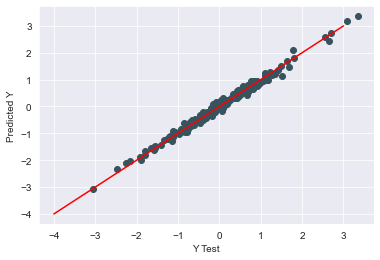

In [20]:
plt.plot(XX,XX,'r')
plt.scatter(yTest,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [21]:
from sklearn import metrics

lmErros = pd.DataFrame([metrics.mean_absolute_error(yTest, predictions),metrics.mean_squared_error(yTest, predictions), np.sqrt(metrics.mean_squared_error(yTest, predictions))],['MAE','MSE','RMSE'])

In [22]:
lmErros.columns=['Erro']

In [23]:
lmErros

,Erro
MAE,0.091224
MSE,0.012713
RMSE,0.112750


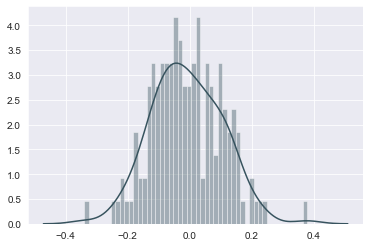

In [24]:
sns.distplot((yTest-predictions),bins=50);

In [25]:
coeffecientsLm = pd.DataFrame(lm.coef_,df[["Media de tempo","Tempo no app","Tempo no site","Duracao da filiacao"]].columns)
coeffecientsLm.columns = ['Coefecientes']
coeffecientsLm


,Coefecientes
Media de tempo,0.325139
Tempo no app,0.483730
Tempo no site,0.002426
Duracao da filiacao,0.772048


### Ridge Regression

Na regressão de Ridge nos adicionamos o termo $\alpha\sum_{i=1}^n\theta_i^2$ na função custo. Isso força os pesos ficarem o menor possível. Se $\alpha$ for escolhido como zero, temos a regressão linear comum, caso alpha seja muito grande a regressão se torna uma constante. 

In Ridge regression we add the term $ \alpha \sum_ {i = 1}^n \theta_i^2 $ in the cost function. This forces the weights to be as small as possible. If $\alpha$ is chosen as zero, we have the common linear regression, if alpha is too large the regression becomes a constant.

In [26]:
from sklearn.linear_model import Ridge

In [27]:
ridgeReg = Ridge(alpha=1, solver="cholesky")

In [28]:
ridgeReg.fit(X,y)

Ridge(alpha=1, solver='cholesky')

In [29]:
coeffecientsRidge = pd.DataFrame(ridgeReg.coef_,df[["Media de tempo","Tempo no app","Tempo no site","Duracao da filiacao"]].columns)
coeffecientsRidge.columns = ['Coefecientes']
coeffecientsRidge

,Coefecientes
Media de tempo,0.321464
Tempo no app,0.484282
Tempo no site,0.005539
Duracao da filiacao,0.774318


In [30]:
predictRidge = ridgeReg.predict(XTest)

Text(0, 0.5, 'Predicted Y')

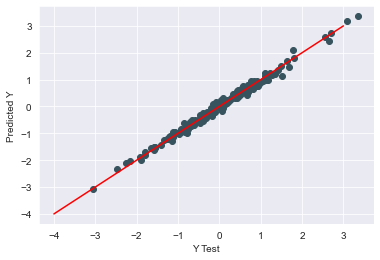

In [31]:
plt.plot(XX,XX,'r')
plt.scatter(yTest,predictRidge)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [32]:
print('MAE:', metrics.mean_absolute_error(yTest, predictRidge))
print('MSE:', metrics.mean_squared_error(yTest, predictRidge))
print('RMSE:', np.sqrt(metrics.mean_squared_error(yTest, predictRidge)))
ridgeErros = pd.DataFrame([metrics.mean_absolute_error(yTest, predictRidge),metrics.mean_squared_error(yTest, predictRidge), np.sqrt(metrics.mean_squared_error(yTest, predictRidge))],['MAE','MSE','RMSE'])
ridgeErros.columns = ['Erro']

MAE: 0.09040460809074916
MSE: 0.012503239781237777
RMSE: 0.11181788667846382


In [33]:
ridgeErros

,Erro
MAE,0.090405
MSE,0.012503
RMSE,0.111818


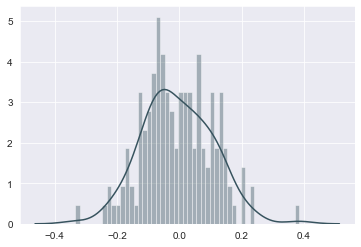

In [34]:
sns.distplot((yTest -predictRidge),bins=50);

### Lasso

Esta regressão se comporta de forma similar a de Ridge, mas com termo de $\alpha \sum_{i=1}^n |\theta_i|$. Com isso, variaveis independentes que tem menos importância tendem a ter peso zero. 

This regression behaves similarly to Ridge, but with a term of $\alpha \sum_ {i = 1}^n |\theta_i| $. Thus, independent variables that are less important tend to have zero weight.

In [35]:
from sklearn.linear_model import Lasso

In [36]:
lassoReg = Lasso(alpha=0.1)

In [37]:
 lassoReg.fit(X, y)

Lasso(alpha=0.1)

In [38]:
predictLasso = lassoReg.predict(XTest)

Text(0, 0.5, 'Predicted Y')

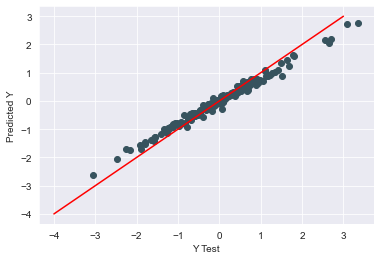

In [39]:
plt.plot(XX,XX,'r')
plt.scatter(yTest,predictLasso)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [40]:
coeffecientsLasso = pd.DataFrame(lassoReg.coef_,df[["Media de tempo","Tempo no app","Tempo no site","Duracao da filiacao"]].columns)
coeffecientsLasso.columns = ['Coefecientes']
coeffecientsLasso

,Coefecientes
Media de tempo,0.224591
Tempo no app,0.385635
Tempo no site,0.000000
Duracao da filiacao,0.684314


In [41]:
print('MAE:', metrics.mean_absolute_error(yTest, predictLasso))
print('MSE:', metrics.mean_squared_error(yTest, predictLasso))
print('RMSE:', np.sqrt(metrics.mean_squared_error(yTest, predictLasso)))
lassoErros = pd.DataFrame([metrics.mean_absolute_error(yTest, predictLasso),metrics.mean_squared_error(yTest, predictLasso), np.sqrt(metrics.mean_squared_error(yTest, predictLasso))],['MAE','MSE','RMSE'])
lassoErros.columns = ['Erro']

MAE: 0.17207461318335107
MSE: 0.04722817970002762
RMSE: 0.2173204539384814


In [42]:
lassoErros

,Erro
MAE,0.172075
MSE,0.047228
RMSE,0.217320


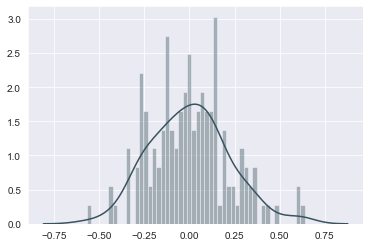

In [43]:
sns.distplot((yTest -predictLasso),bins=50);

## Conclusão

Como vemos a baixo, Lasso teve os menores pesos mas, em contra partida, teve os piores erros. Ridge obteve os menores erros mas os pesos ficaram um pouco maior que o linear. 

As we see below, Lasso had the lowest weights but, on the other hand, it had the worst mistakes. Ridge had the smallest errors but the weights were slightly higher than the linear.

In [44]:
coef= pd.concat([coeffecientsLm,coeffecientsRidge,coeffecientsLasso],axis=1)
coef.columns = ['Linear','Ridge','Lasso']

In [45]:
coef

,Linear,Ridge,Lasso
Media de tempo,0.325139,0.321464,0.224591
Tempo no app,0.483730,0.484282,0.385635
Tempo no site,0.002426,0.005539,0.000000
Duracao da filiacao,0.772048,0.774318,0.684314


In [46]:
erros= pd.concat([lmErros,ridgeErros,lassoErros],axis=1)
erros.columns = ['Linear','Ridge','Lasso']
erros

,Linear,Ridge,Lasso
MAE,0.091224,0.090405,0.172075
MSE,0.012713,0.012503,0.047228
RMSE,0.112750,0.111818,0.217320


Para melhoramentos do código futuramente, poderíamos usar GridSearchCV para achar os parametros que minimizam um dos erros escolhidos e implementar o modelo ElasticNET.

For code improvements in the future, we could use GridSearchCV to find the parameters that minimize one of the chosen errors and implement the ElasticNET model.

# Bibliografia

Hands-on Machine Learning, Keras, and TensorFlow - *Aurélien Géron*